In [1]:
import numpy as np
import math

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker
import matplotlib.gridspec as gridspec

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

from IPython.display import Image

from tqdm import tqdm
import os 

In [2]:
Years = ["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009"]

Months = []
for imon in range(1,13): ### shw
    Months.append(str(imon).zfill(2))
    
Days = []
for iday in range(1,30,3):
    Days.append(str(iday).zfill(2))
    
print(Years)
print(Months)
print(Days)

['2000', '2001', '2002']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
['01', '04', '07', '10', '13', '16', '19', '22', '25', '28']


In [3]:
Pressure = [100, 75, 65, 55, 40, 30] # hPa
Height   = [16,  18, 19, 20, 22, 24] # km

In [4]:
N_head = 5 # first 5 lines are head lines, not include data
N_column = 4

# Nx = 36
# Ny = 21
# Nz = 5
# N_parcel = 3780

Nx = 24
Ny = 21
Nz = 6
N_parcel = Nx*Ny*Nz

if Nx*Ny*Nz!=N_parcel: print('ERROR: parcel number is wrong!')
    

directory = './Lifetime/'
filename = "Lifetime_"+Years[0]+Months[0]+Days[0]+".txt"
print(directory+filename)

/n/home12/hongwei/HONGWEI/lagranto.era5/Simulation/Python_plot/Lifetime_2000/Lifetime_20000101.txt


In [5]:
N_year  = len(Years)
N_month = len(Months)
N_day   = len(Days)

lifetime   = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_N = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_S = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
Lon = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
Lat = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
Lev = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

lifetime.shape

(5, 21, 36, 10, 12, 3)

In [6]:
for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            directory = './Lifetime/'
            filename = "Lifetime_"+Years[i_year]+Months[i_month]+Days[i_day]+".txt"
            File = open(directory+filename, 'r')
        
            Lines = File.readlines()

            # Strips the newline character
            data = []
            data_N = []
            data_S = []
            data_x = []
            data_y = []
            data_z = []
            for line in Lines:
                a = line.split(',')
                data.append(float(a[0])) # total lifetime
                data_N.append(float(a[1])) # total N lifetime
                data_S.append(float(a[2])) # total S lifetime
                data_x.append(float(a[3])) # lon
                data_y.append(float(a[4])) # lat
                data_z.append(float(a[5])) # p
    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz):
                        lifetime[iz,iy,ix,i_day,i_month,i_year] = data[i]
                        lifetime_N[iz,iy,ix,i_day,i_month,i_year] = data_N[i]
                        lifetime_S[iz,iy,ix,i_day,i_month,i_year] = data_S[i]
                        Lon[iz,iy,ix,i_day,i_month,i_year] = data_x[i]
                        Lat[iz,iy,ix,i_day,i_month,i_year] = data_y[i]
                        Lev[iz,iy,ix,i_day,i_month,i_year] = data_z[i]

                        i = i+1
                        
                        

100%|██████████| 12/12 [00:02<00:00,  5.79it/s]


In [7]:
# month-mean

# lifetime(Nz, Ny, Nx, N_day, N_month, N_year)

lifetime_mon = np.mean(lifetime, axis=(3,5))
lifetime_N_mon = np.mean(lifetime_N, axis=(3,5))
lifetime_S_mon = np.mean(lifetime_S, axis=(3,5))

lifetime_mon.shape

(5, 21, 36, 12)

In [8]:
# regrid (lon,lat) from (10,2) to (30,6)
# combin 3x3 to 1 grid

Nx3 = int(Nx/3)
Ny3 = int(Ny/3)

lifetime_mon_9   = np.zeros((Nz, Ny3, Nx3, N_month))
lifetime_N_mon_9 = np.zeros((Nz, Ny3, Nx3, N_month))
lifetime_S_mon_9 = np.zeros((Nz, Ny3, Nx3, N_month))


for ix in range(Nx3):
    for iy in range(Ny3):
        lifetime_mon_9[:,iy,ix,:]   = np.mean(  lifetime_mon[:, iy*3:(iy+1)*3, ix*3:(ix+1)*3, :], axis=(1,2))
        lifetime_N_mon_9[:,iy,ix,:] = np.mean(lifetime_N_mon[:, iy*3:(iy+1)*3, ix*3:(ix+1)*3, :], axis=(1,2))
        lifetime_S_mon_9[:,iy,ix,:] = np.mean(lifetime_S_mon[:, iy*3:(iy+1)*3, ix*3:(ix+1)*3, :], axis=(1,2))
        
Lon2d_3 = Lon[0,1:Ny:3,1:Nx:3,0,0,0]
Lat2d_3 = Lat[0,1:Ny:3,1:Nx:3,0,0,0]
Lev2d_3 = Lev[0,1:Ny:3,1:Nx:3,0,0,0]

lifetime_mon_9.shape, Lon2d_3.shape

((5, 7, 12, 12), (7, 12))

In [9]:
print(Ny*Nx*N_day*N_month*N_year)

272160


In [10]:
# first test: one time injection
#
# Lon2d = Lon[0,:,:,0,0,0]
# Lat2d = Lat[0,:,:,0,0,0]
# Lev2d = Lev[0,:,:,0,0,0]

# Lon1d = Lon2d
# Lat1d = Lat2d
# Lev1d = Lev2d


#


In [11]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html

# (Nz, Ny, Nx, N_month)
Result_mon     = lifetime_mon_9[0,:,:,:]*0.0
Lifetime_LP    = lifetime_mon_9[:,:,:,:]*0.0
Lifetime_LP_N  = lifetime_mon_9[:,:,:,:]*0.0
Lifetime_LP_S  = lifetime_mon_9[:,:,:,:]*0.0
D_lifetime_LP  = lifetime_mon_9[:,:,:,:]*0.0

iz = 1

# for LP solve: max lifetime under the interhemispheric balance
for iz in range(Nz):
    print(iz)
    for imon in range(N_month):
        Life   = lifetime_mon_9[iz,:,:,imon].flatten()
        Life_S = lifetime_N_mon_9[iz,:,:,imon].flatten()
        Life_N = lifetime_S_mon_9[iz,:,:,imon].flatten()

        if sum(Life_S)+sum(Life_N)-sum(Life)>0.01: print("ERROR!!!")
    
        N = len(Life)

        #
        c = -1*Life

        Xs_bounds = []
        A1 = []
        A3 = []
        A4 = []
        A  = []
        for i in range(N):
            Xs_bounds.append((0, N))
            A1.append(1)
            A3.append( Life_N[i] -Life_S[i] -0.05*Life[i] )
            A4.append( -1*(Life_N[i] -Life_S[i] +0.05*Life[i]) )

        Aub = [A3,A4]
        Aeq = [A1]   

        b_ub = [0,0]
        b_eq = [N]

        from scipy.optimize import linprog
        res = linprog(c, A_eq=Aeq, b_eq=b_eq, A_ub=Aub, b_ub=b_ub, bounds=Xs_bounds)
    
        # post-process, calculate the injection percentage
        Result1d = np.round(res.x)
        Result2d = Result1d.reshape(Ny3,Nx3)
        Result2d = Result2d/np.sum(Result2d)*100
    
        Result_mon[:,:,imon] = Result2d
    

    Lifetime_LP[iz,:,:,:] = lifetime_mon_9[iz,:,:,:]* (Result_mon/100)

    Lifetime_LP_N[iz,:,:,:] = lifetime_N_mon_9[iz,:,:,:]* (Result_mon/100)
    Lifetime_LP_S[iz,:,:,:] = lifetime_S_mon_9[iz,:,:,:]* (Result_mon/100)
    D_lifetime_LP[iz,:,:,:] = Lifetime_LP_N[iz,:,:,:] - Lifetime_LP_S[iz,:,:,:]


print(lifetime_mon_9[:,:,:,:].shape, Result_mon.shape)



0


<ipython-input-11-0c00a23190ff>:45: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  res = linprog(c, A_eq=Aeq, b_eq=b_eq, A_ub=Aub, b_ub=b_ub, bounds=Xs_bounds)
<ipython-input-11-0c00a23190ff>:45: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  res = linprog(c, A_eq=Aeq, b_eq=b_eq, A_ub=Aub, b_ub=b_ub, bounds=Xs_bounds)
/n/home12/hongwei/.conda/envs/SUNenv/lib/python3.8/site-packages/scipy/optimize/_linprog_ip.py:116: LinAlgWarning: Ill-conditioned matrix (rcond=6.48351e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


1
2
3
4
(5, 7, 12, 12) (7, 12, 12)


In [13]:
# get the max lifetime

Inject_percent = np.zeros((Nz, Ny3, Nx3, N_month))
Lifetime_max   = np.zeros((Nz, Ny3, Nx3, N_month))
Lifetime_max_N = np.zeros((Nz, Ny3, Nx3, N_month))
Lifetime_max_S = np.zeros((Nz, Ny3, Nx3, N_month))
D_lifetime_max = np.zeros((Nz, Ny3, Nx3, N_month))

print(Inject_percent.shape)

for iz in range(Nz):
    for i_mon in range(N_month):
        a   = lifetime_mon_9[iz,:,:,i_mon]
        idx = np.unravel_index(np.argmax(a, axis=None), a.shape)
#         print(iz,idx[0],idx[1],i_mon)
        Inject_percent[iz,idx[0],idx[1],i_mon] = 100


    Lifetime_max[iz,:,:,:] = lifetime_mon_9[iz,:,:,:]* (Inject_percent[iz,:,:,:]/100)

    Lifetime_max_N[iz,:,:,:] = lifetime_N_mon_9[iz,:,:,:]* (Inject_percent[iz,:,:,:]/100)
    Lifetime_max_S[iz,:,:,:] = lifetime_S_mon_9[iz,:,:,:]* (Inject_percent[iz,:,:,:]/100)
    D_lifetime_max[iz,:,:,:] = Lifetime_max_N[iz,:,:,:] - Lifetime_max_S[iz,:,:,:]
    
    
print(Lifetime_max.shape)

(5, 7, 12, 12)
(5, 7, 12, 12)


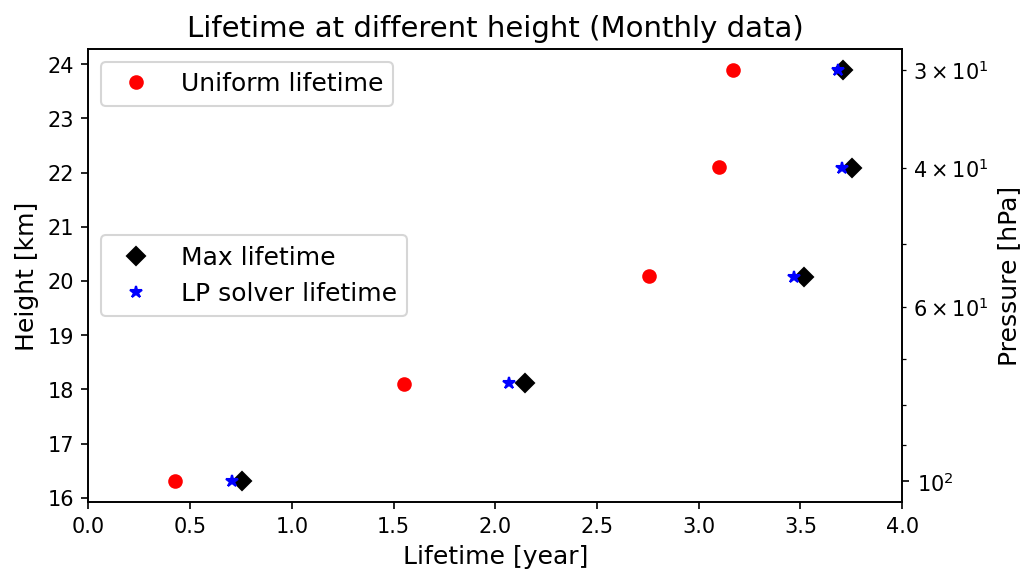

In [14]:
Life_LP_mon = np.sum(Lifetime_LP[:,:,:,:], axis=(1,2))/365.25
Life_max_mon = np.sum(Lifetime_max[:,:,:,:], axis=(1,2))/365.25
Life_uniform_mon = np.mean(lifetime_mon_9[:,:,:,:],axis=(1,2))/365.25

Life_LP_z  = np.mean(Life_LP_mon[:,:],axis=1)
Life_max_z = np.mean(Life_max_mon[:,:],axis=1)
Life_uniform_z = np.mean(Life_uniform_mon[:,:],axis=1)

### plot
fig, ax1 = plt.subplots(figsize=(7,4), dpi=150)

###
ax1.plot(Life_uniform_z, Height, 'ro', label='Uniform lifetime')
# ax1.plot(lifetime_mean+lifetime_std, Height, 'r.')
# ax1.plot(lifetime_mean-lifetime_std, Height, 'r.')

# for i in range(5):
#     ax1.plot([lifetime_mean[i]-lifetime_std[i],lifetime_mean[i]+lifetime_std[i]], [Height[i], Height[i]], 'r-')
# print([lifetime_mean[0]-lifetime_std[0],lifetime_mean[0]-lifetime_std[0]])

ax1.set_xlim(0,4)

ax1.set_xlabel('Lifetime [year]', fontsize=12)
ax1.set_ylabel('Height [km]', fontsize=12)
ax1.legend(loc='upper left', fontsize=12);

###
ax2 = ax1.twinx()
ax2.plot(Life_max_z, Pressure, 'kD', label='Max lifetime')
ax2.plot(Life_LP_z, Pressure, 'b*', label='LP solver lifetime')

ax2.set_ylabel('Pressure [hPa]', fontsize=12)
ax2.set_yscale('log')
ax2.invert_yaxis()
ax2.legend(loc="center left", fontsize=12);

###
# ax3 = ax1.twinx()
# ax3.plot(Life_LP_z, Pressure, 'b*', label='LP solver lifetime')

# ax3.set_ylabel('Pressure [hPa]', fontsize=12)
# ax3.set_yscale('log')
# ax3.invert_yaxis()
# ax3.legend(loc="upper left", fontsize=12);


plt.title('Lifetime at different height (Monthly data)', fontsize=14);

In [15]:
# find the (ix, iy) for the LP injection and Max injection

# iy_max, ix_max = np.where(Lifetime_max[:,:,imon] == np.max(Lifetime_max[:,:,imon]))
# print(iy_max[0], ix_max[0])

# Lifetime_max[iy_max,ix_max,imon], lifetime_mon_9[iz,iy_max,ix_max,imon]

In [16]:
# iy_LP, ix_LP = np.where(Lifetime_LP[:,:,imon] > 0)
# print(iy_LP, ix_LP)

# Lifetime_LP2[iy_LP,ix_LP,imon], lifetime_mon_9[iz,iy_LP,ix_LP,imon]

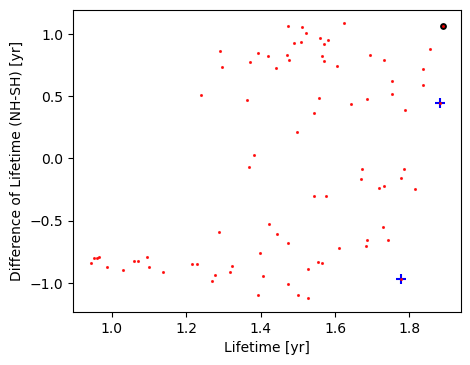

In [59]:
imon = 2
iz = 1

# find the location
iy_max, ix_max = np.where(Lifetime_max[iz,:,:,imon] == np.max(Lifetime_max[iz,:,:,imon]))
iy_LP, ix_LP = np.where(Lifetime_LP[iz,:,:,imon] > 0)

# plot
D_life = lifetime_N_mon_9 - lifetime_S_mon_9

figure = plt.figure(figsize=(5,4), dpi=100)

plt.scatter(lifetime_mon_9[iz,iy_max,ix_max,imon]/365, D_life[iz,iy_max,ix_max,imon]/365, 
            marker='o', color='black', s=15, alpha=1)

plt.scatter(lifetime_mon_9[iz,iy_LP,ix_LP,imon]/365, D_life[iz,iy_LP,ix_LP,imon]/365, 
            marker='+', color='blue', s=60, alpha=1)

plt.scatter(lifetime_mon_9[iz,:,:,imon]/365, D_life[iz,:,:,imon]/365, marker='.', color='red', s=6, alpha=0.8)

plt.xlabel("Lifetime [yr]")
plt.ylabel("Difference of Lifetime (NH-SH) [yr]");


(5, 7, 12, 12)

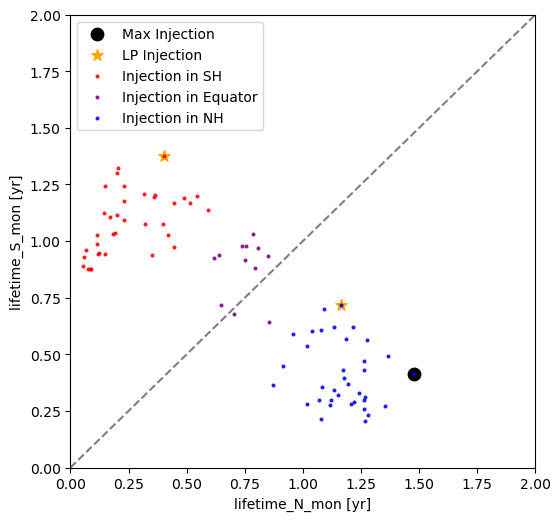

In [60]:

# find the location
iy_max, ix_max = np.where(Lifetime_max[iz,:,:,imon] == np.max(Lifetime_max[iz,:,:,imon]))
iy_LP, ix_LP = np.where(Lifetime_LP[iz,:,:,imon] > 0)

# plot
D_life = lifetime_N_mon_9 - lifetime_S_mon_9

figure = plt.figure(figsize=(6,6), dpi=100)

plt.scatter(lifetime_N_mon_9[iz,iy_max,ix_max,imon]/365, 
            lifetime_S_mon_9[iz,iy_max,ix_max,imon]/365, 
            marker='o', color='black', s=80, alpha=1, label='Max Injection')


plt.scatter(lifetime_N_mon_9[iz,iy_LP,ix_LP,imon]/365, 
            lifetime_S_mon_9[iz,iy_LP,ix_LP,imon]/365, 
            marker='*', color='orange', s=70, alpha=1, label='LP Injection')


plt.scatter(lifetime_N_mon_9[iz,0:3,:,imon]/365, 
            lifetime_S_mon_9[iz,0:3,:,imon]/365, 
            marker='.', color='red', s=15, alpha=0.8, label='Injection in SH')

plt.scatter(lifetime_N_mon_9[iz,3,:,imon]/365, 
            lifetime_S_mon_9[iz,3,:,imon]/365, 
            marker='.', color='purple', s=15, alpha=0.8, label='Injection in Equator')

plt.scatter(lifetime_N_mon_9[iz,4:7,:,imon]/365, 
            lifetime_S_mon_9[iz,4:7,:,imon]/365, 
            marker='.', color='blue', s=15, alpha=0.8, label='Injection in NH')



plt.plot([0,2], [0,2], 'k--', alpha=0.5)

plt.xlim(0,2)
plt.ylim(0,2)

plt.xlabel("lifetime_N_mon [yr]")
plt.ylabel("lifetime_S_mon [yr]");

plt.legend()

lifetime_N_mon_9.shape

((21,),
 array([-20., -18., -16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,
          2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.]))

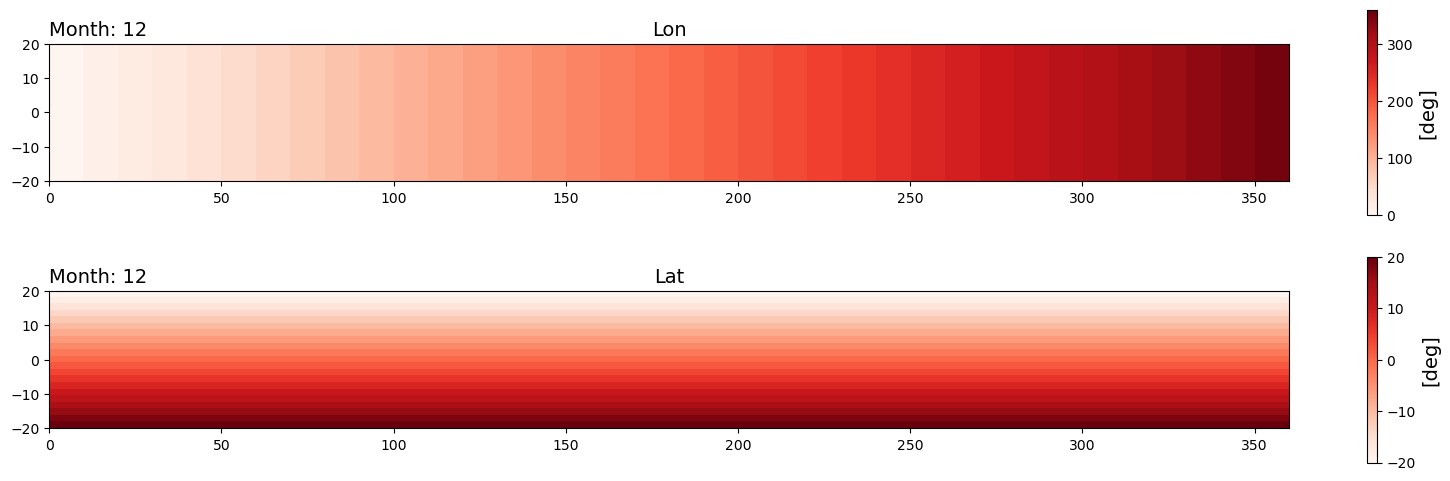

In [40]:
# check lon, lat are correct!!!

fig = plt.figure(figsize=(20,6), dpi=100)
extent = [0 , 360 , -20 , 20]

# Lon[iz,iy,ix,i_day,i_month,i_year]
# lifetime
ax0 = plt.subplot(2, 1, 1)

ax0_pixel = plt.imshow(Lon[0,:,:,0,0,0], vmin=0, vmax=360,\
           extent = extent, cmap='Reds', interpolation='nearest')

cb0 = plt.colorbar(ax0_pixel, ax=ax0)
cb0.set_label('[deg]', fontsize=14);

ax0.set_title(f"Lon", fontsize=14);
ax0.set_title(f"Month: {i_mon+1}", fontsize=14, loc="left");


###
ax1 = plt.subplot(2, 1, 2)

ax1_pixel = plt.imshow(Lat[0,:,:,0,0,0], vmin=-20, vmax=20,\
           extent = extent, cmap='Reds', interpolation='nearest')

cb1 = plt.colorbar(ax1_pixel, ax=ax1)
cb1.set_label('[deg]', fontsize=14);

ax1.set_title(f"Lat", fontsize=14);
ax1.set_title(f"Month: {i_mon+1}", fontsize=14, loc="left");

Lat[0,:,0,0,0,0].shape, Lat[0,:,0,0,0,0]

## Important for ploting: lat should be reversed!!!



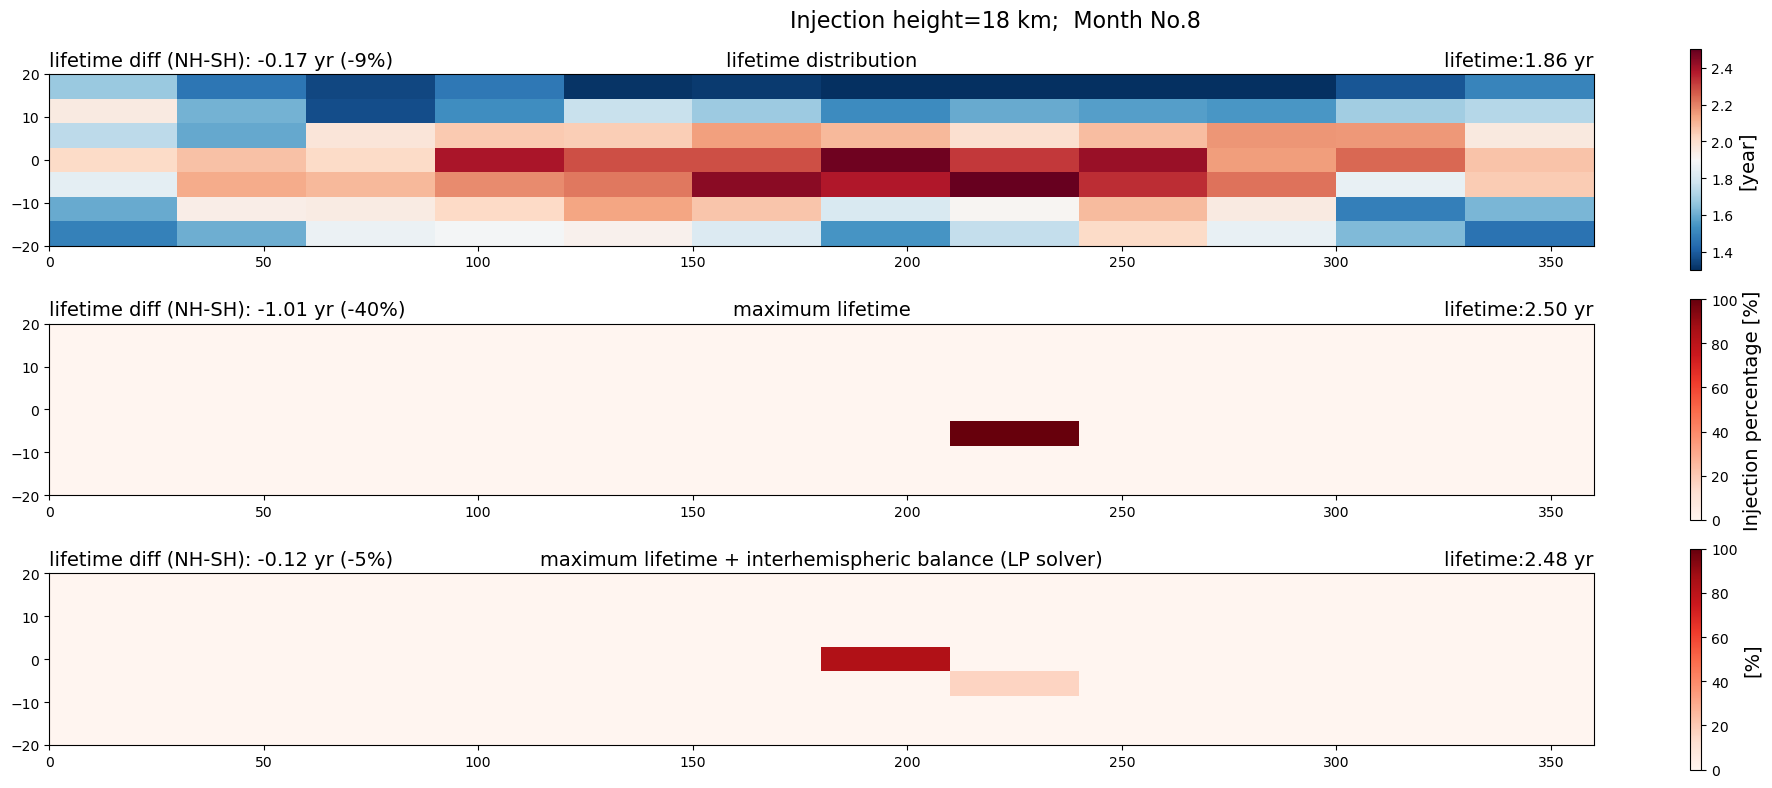

In [24]:
# select one month as a example

i_mon = 7

Life_LP = np.sum(Lifetime_LP[:,:,i_mon]/365.25, axis=(0,1))
Life_max = np.sum(Lifetime_max[:,:,i_mon]/365.25, axis=(0,1))


D_Life_LP = np.sum(D_lifetime_LP[:,:,i_mon]/365.25, axis=(0,1))
D_Life_max = np.sum(D_lifetime_max[:,:,i_mon]/365.25, axis=(0,1))


fig = plt.figure(figsize=(20,8), dpi=100)
plt.suptitle(f"Injection height={Height[iz]:.0f} km;  Month No.{i_mon+1}", fontsize=16);

extent = [0 , 360 , -20 , 20]

# Lon[iz,iy,ix,i_day,i_month,i_year]

#-----------------------------------------------------
# (1) lifetime
#-----------------------------------------------------
ax0 = plt.subplot(3, 1, 1)

ax0_pixel = plt.imshow(lifetime_mon_9[iz,::-1,:,i_mon]/365, vmin=1.3, vmax=2.5,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

cb0 = plt.colorbar(ax0_pixel, ax=ax0)
cb0.set_label('[year]', fontsize=14);

Life_uniform = np.mean(lifetime_mon_9[iz,::-1,:,i_mon],axis=(0,1))/365

ax0.set_title(f"lifetime distribution", fontsize=14);
ax0.set_title(f"lifetime:{Life_uniform:.2f} yr", 
              fontsize=14, loc="right");

D_Life_uniform = np.mean(lifetime_N_mon_9[iz,:,:,i_mon]-lifetime_S_mon_9[iz,:,:,i_mon], axis=(0,1))/365

ax0.set_title(f"lifetime diff (NH-SH): {D_life_uniform:.2f} yr ({100*D_Life_uniform/Life_uniform:.0f}%)", 
              fontsize=14, loc="left");

#----------------------------------------------------
# (2) maximum lifetime
#-----------------------------------------------------
ax1 = plt.subplot(3, 1, 2)
ax1_pixel = plt.imshow(Inject_percent[iz,::-1,:,i_mon], vmin=0, vmax=100,\
           extent = extent, cmap='Reds', interpolation='nearest')

cb1 = plt.colorbar(ax1_pixel, ax=ax1)
cb1.set_label('Injection percentage [%]', fontsize=14);

ax1.set_title(f"maximum lifetime", fontsize=14);
ax1.set_title(f"lifetime:{Life_max:.2f} yr", fontsize=14, loc="right");
ax1.set_title(f"lifetime diff (NH-SH): {D_Life_max:.2f} yr ({100*D_Life_max/Life_max:.0f}%)", 
              fontsize=14, loc="left");


#-----------------------------------------------------
# (3) maximum lifetime and ensrue interhemispheric balance
#-----------------------------------------------------
ax2 = plt.subplot(3, 1, 3)
ax2_pixel = plt.imshow(Result_mon[::-1,:,i_mon], vmin=0, vmax=100,\
           extent = extent, cmap='Reds', interpolation='nearest')

cb2 = plt.colorbar(ax2_pixel, ax=ax2)
cb2.set_label('[%]', fontsize=14);

ax2.set_title("maximum lifetime + interhemispheric balance (LP solver)", fontsize=14);
ax2.set_title(f"lifetime:{Life_LP:.2f} yr", fontsize=14, loc="right");
ax2.set_title(f"lifetime diff (NH-SH): {D_Life_LP:.2f} yr ({100*D_Life_LP/Life_LP:.0f}%)", 
              fontsize=14, loc="left");

plt.tight_layout()